# Project 01

**Submitted by: Diego Sol**

CSCE 636-600: Deep Learning

Professor: Dr. Anxiao Jiang

Mount Google Drive to this notebook to easily access training data

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import packages

In [28]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Download training images and labels

In [29]:
all_images = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/CSCE_636_Project_1/636_project1_train_images', 'rb'))
all_labels = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/CSCE_636_Project_1/636_project1_train_labels', 'rb'))

Split the data into training and validation sets

In [30]:
data_split = 50000

train_images = all_images[:data_split,:,:]
train_labels = all_labels[:data_split,]

test_images = all_images[data_split:,:,:]
test_labels = all_labels[data_split:,]

In [31]:
train_images[1].shape

TensorShape([28, 28])

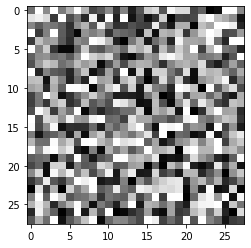

In [32]:
# all_images.shape
digit = all_images[3]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [33]:
def build_model():
  inputs = keras.Input(shape=(28, 28, 1))
  x = layers.Rescaling(1./255)(inputs)

  # convolutional layers
  x = layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=(2, 2))(x)
  x = layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=(2, 2))(x)

  x = layers.Flatten()(x)
  x = layers.Dropout(0.5)(x)

  outputs = layers.Dense(10, activation="softmax")(x)

  model = keras.Model(inputs=inputs, outputs=outputs)

  model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

  return model

  # keras.utils.plot_model(model, show_shapes=True, to_file="simple_convnet.png")

Use callbacks to save the best model

In [36]:
callbacks_list = [
                  keras.callbacks.ModelCheckpoint(
                      filepath="noisy_MNIST_convnet.keras",
                      monitor="val_loss",
                      save_best_only=True
                  )]

Fit model with K-fold validation

In [ ]:
k = 4
num_val_samples = len(train_images) // k
num_epochs = 30
all_scores = []

for i in range(k):
    print(f"Processing fold #{i}")

    val_data = train_images[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_images[:i * num_val_samples],
         train_images[(i + 1) * num_val_samples:]],
        axis=0)
    
    partial_train_targets = np.concatenate(
        [train_labels[:i * num_val_samples],
         train_labels[(i + 1) * num_val_samples:]],
        axis=0)
    
    # build the model
    model = build_model()

    # train the model
    model.fit(partial_train_data,
              partial_train_targets,
              epochs=num_epochs,
              batch_size=32,
              callbacks=callbacks_list,
              # verbose=0
              )
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

# history = model.fit(train_images, train_labels,
#           epochs=50,
#           validation_split=0.4,
#           batch_size=32,
#           callbacks=callbacks_list)

Processing fold #0
Epoch 1/30
1172/1172 [==============================] - 5s 4ms/step - loss: 2.1452 - accuracy: 0.2163
Epoch 2/30
1172/1172 [==============================] - 5s 4ms/step - loss: 1.8114 - accuracy: 0.3658
Epoch 3/30
1172/1172 [==============================] - 5s 4ms/step - loss: 1.5855 - accuracy: 0.4543
Epoch 4/30
1172/1172 [==============================] - 5s 4ms/step - loss: 1.4874 - accuracy: 0.4898
Epoch 5/30
1172/1172 [==============================] - 5s 4ms/step - loss: 1.4267 - accuracy: 0.5119
Epoch 6/30
1172/1172 [==============================] - 5s 4ms/step - loss: 1.3873 - accuracy: 0.5275
Epoch 7/30
1172/1172 [==============================] - 5s 4ms/step - loss: 1.3549 - accuracy: 0.5396
Epoch 8/30
1172/1172 [==============================] - 5s 4ms/step - loss: 1.3279 - accuracy: 0.5494
Epoch 9/30
1172/1172 [==============================] - 5s 4ms/step - loss: 1.3087 - accuracy: 0.5522
Epoch 10/30
1172/1172 [==============================] - 5s 4ms

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [ ]:
# history data
history_dict = history.history

# training metric history
train_loss_values = history_dict["loss"]
train_acc_values = history_dict["accuracy"]

# validation metric history
val_loss_values = history_dict["val_loss"]
val_acc_values = history_dict["val_accuracy"]

# epochs
epochs = range(1, len(train_loss_values) + 1)

In [ ]:
# history data
history_dict = history.history

# training metric history
train_loss_values = history_dict["loss"]
train_acc_values = history_dict["accuracy"]

# validation metric history
val_loss_values = history_dict["val_loss"]
val_acc_values = history_dict["val_accuracy"]

# epochs
epochs = range(1, len(train_loss_values) + 1)

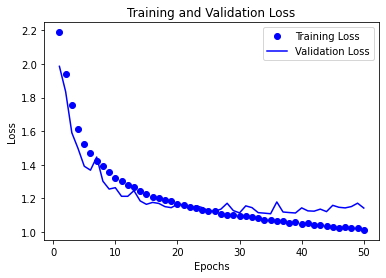

In [ ]:
# create figure for training data
fig3, ax3 = plt.subplots()

# plot
ax3.plot(epochs, train_loss_values, "bo", label="Training Loss")
ax3.plot(epochs, val_loss_values, "b", label="Validation Loss")
ax3.set_title("Training and Validation Loss")
ax3.set_xlabel("Epochs")
ax3.set_ylabel("Loss")
ax3.legend()
plt.show()

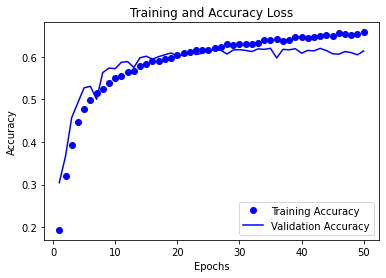

In [ ]:
# create figure for training data
fig4, ax4 = plt.subplots()

# plot
ax4.plot(epochs, train_acc_values, "bo", label="Training Accuracy")
ax4.plot(epochs, val_acc_values, "b", label="Validation Accuracy")
ax4.set_title("Training and Accuracy Loss")
ax4.set_xlabel("Epochs")
ax4.set_ylabel("Accuracy")
ax4.legend()
plt.show()

In [ ]:
# print final results
results = model.evaluate(test_images, test_labels)
print(f'Network loss:     {results[0]}')
print(f'Network accuracy: {results[1]}')

313/313 [==============================] - 1s 2ms/step - loss: 1.1488 - accuracy: 0.6064
Network loss:     1.1488090753555298
Network accuracy: 0.6064000129699707


In [ ]:
predictions = model.predict(test_images)

In [ ]:
idx = 9

print('Prediction: %i' % predictions[idx].argmax())
print(predictions[idx][predictions[idx].argmax()]*100)

tf.print('Truth: %i' % test_labels[idx])

Prediction: 9
44.959813356399536
Truth: 9
